# Classification on Provided Dataset

In [1]:
from google.colab import files
import io
import pandas as pd

pd.set_option('display.max_columns', None)
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [2]:
data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='confusion matrix', cmap=plt.cm.PuBuGn):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    


## Churn_Modelling Dataset


In [6]:
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns

data = pd.read_csv('Churn_Modelling.csv',header='infer')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Suppose we convert the problem into a binary classification task (Exited versus Continued), given limited no of training examples. We can do it by replacing the class labels of the instances 0 to Continued and 1 to Exited

In [7]:

data['Exited'] = data['Exited'].replace([0],'Continued')
data['Exited'] = data['Exited'].replace([1],'Exited')

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Continued
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Continued
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Continued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,Continued
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,Continued
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Exited


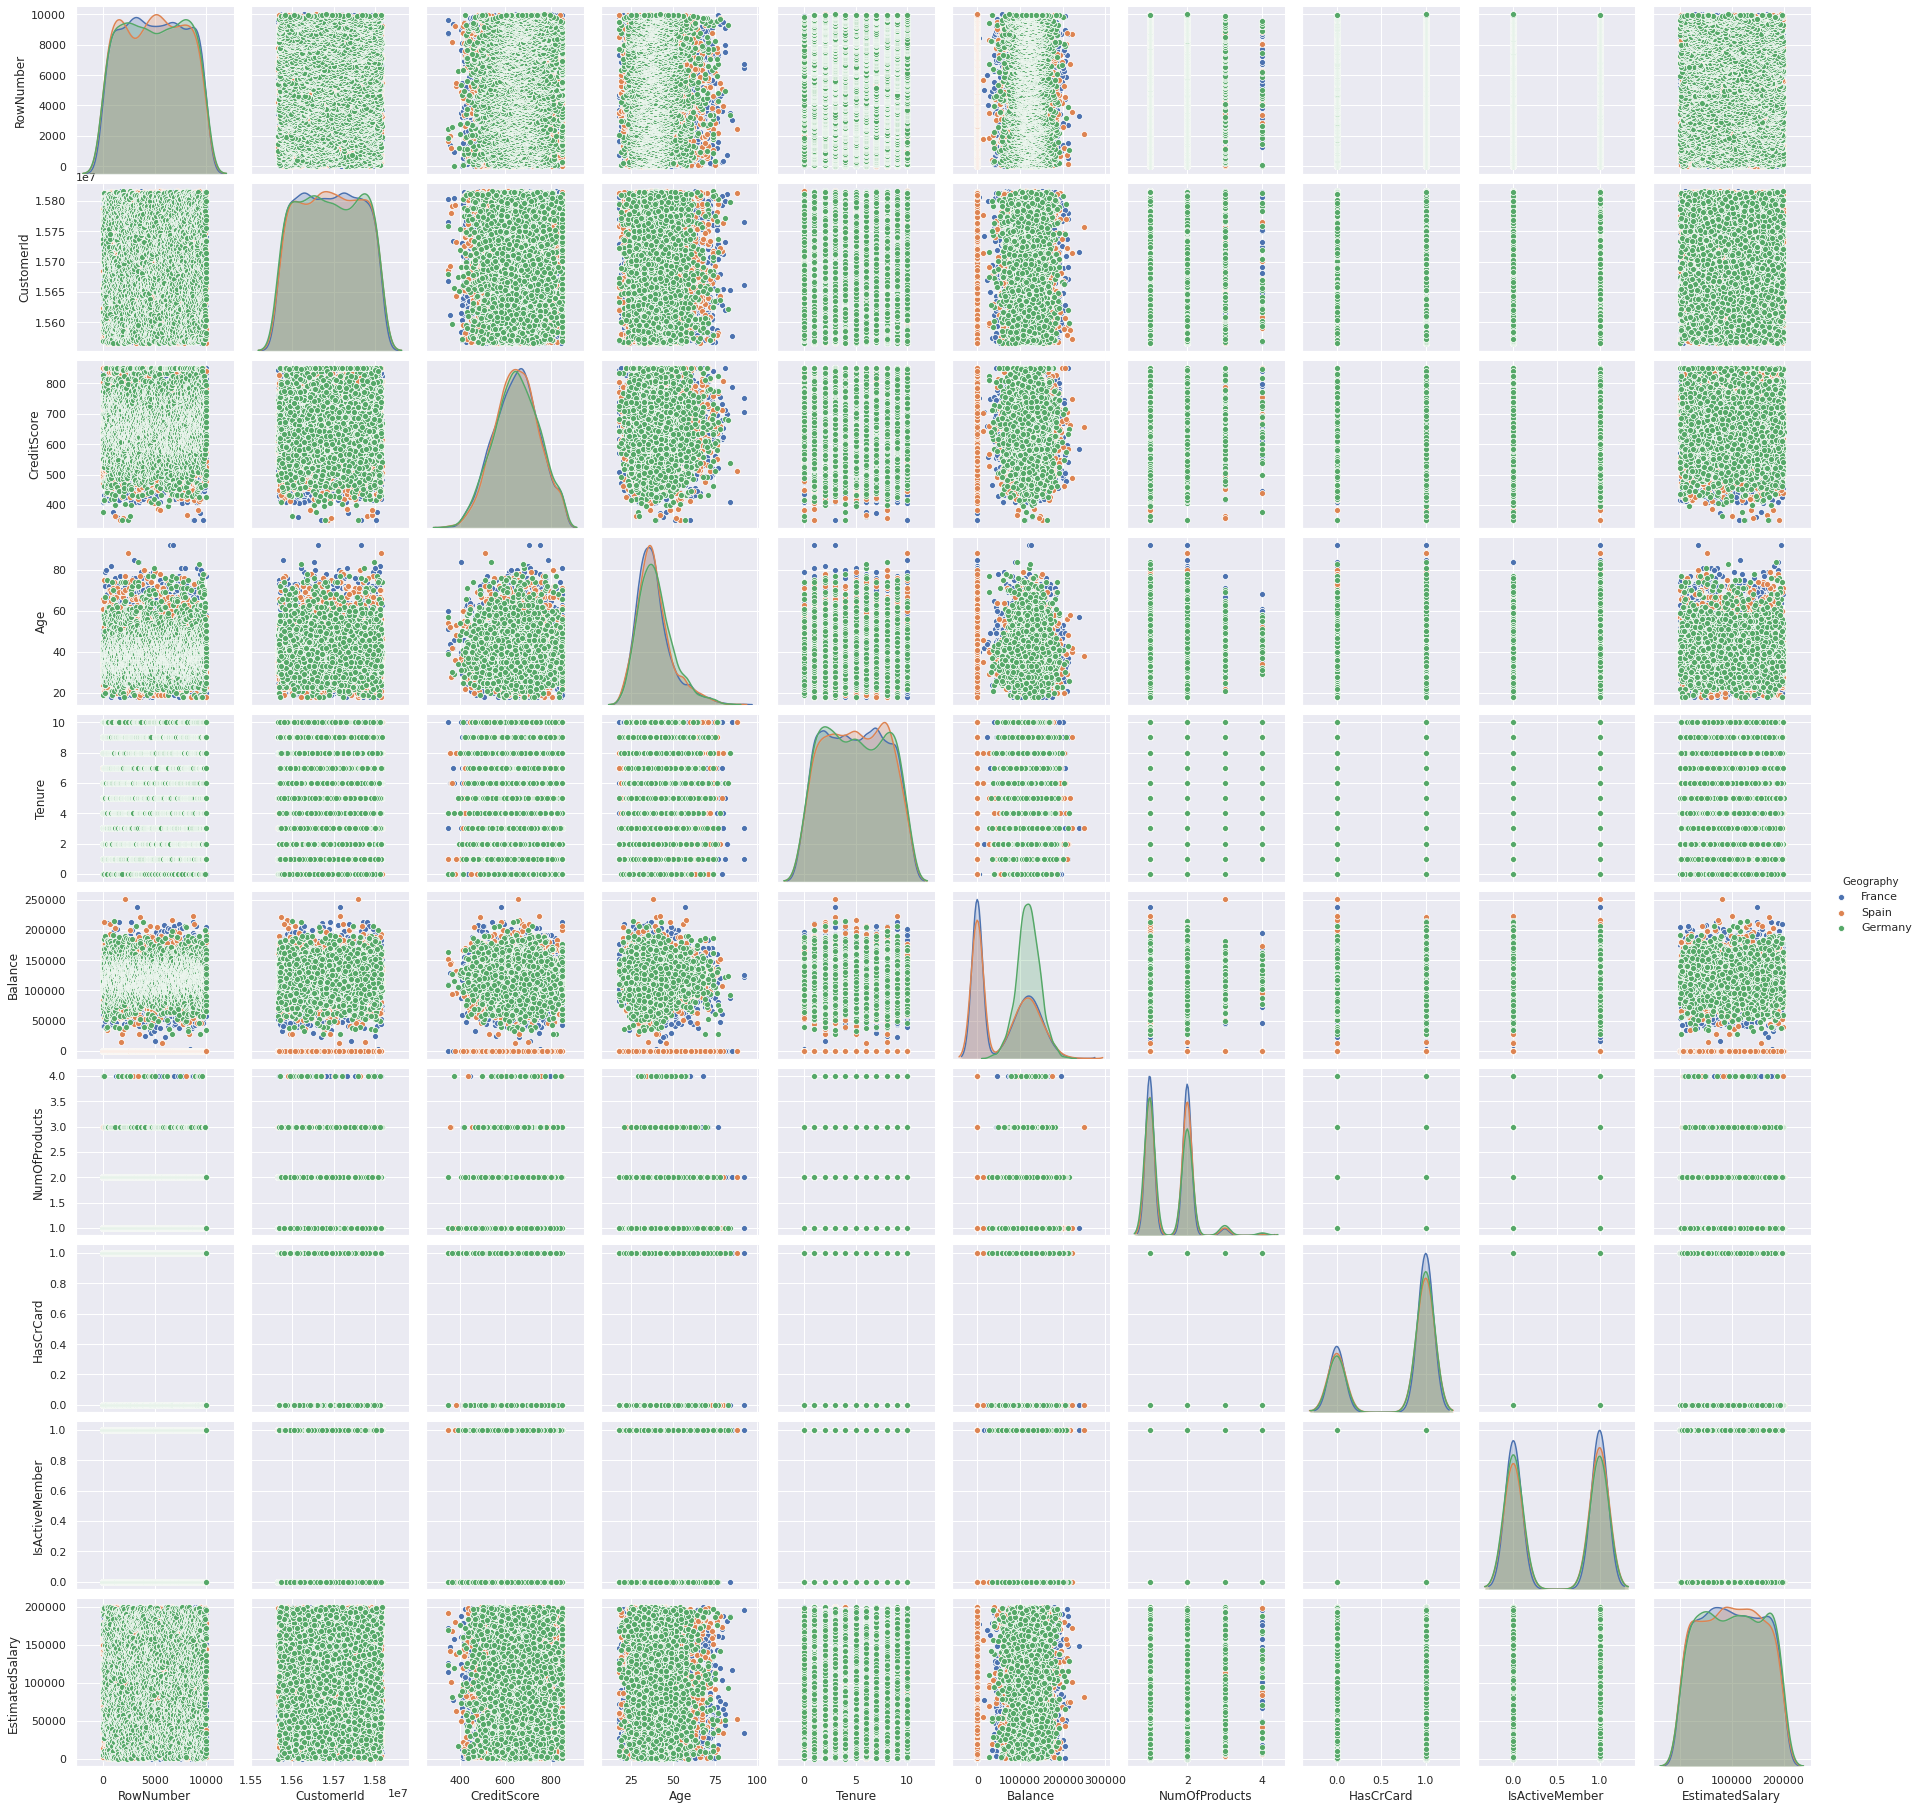

In [8]:
# Paired plot using seaborn
sns.set()
sns.pairplot(data[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']], hue='Geography', diag_kind="kde")

Applying Pandas cross-tabulation to examine the relationship between the Gender and Age attributes with respect to Exited. 

In [9]:
pd.crosstab([data['Gender'],data['Age']],data['Exited'])

Exited      Continued  Exited
Gender Age                   
Female 18           4       0
       19           8       1
       20          12       1
       21          31       2
       22          36       6
...               ...     ...
Male   81           2       0
       83           1       0
       84           1       0
       88           1       0
       92           2       0

[135 rows x 2 columns]

## Decision Tree Classifier

In this section, we apply a decision tree classifier to the Churn_Modelling dataset described in the previous subsection.

In [0]:
from sklearn import tree

Y = pd.DataFrame(data, columns=['Exited'])
X = data.drop(['Gender', 'Surname', 'Geography', 'Exited'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)


In [11]:
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)  

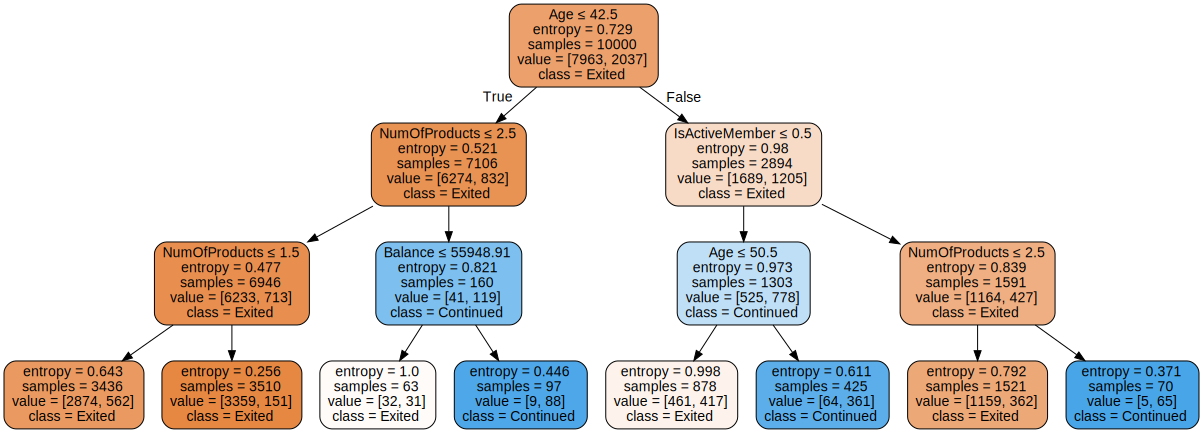

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Exited','Continued'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Next, suppos decision tree is applied to classify the following test examples.

In [14]:
test_Data = [[5,15737888,'Mitchell',850,'Spain','Female',43,2,122510.82,1,1,1,79084.10,'Continued'],
           [6,15574012,'chu',645,'Spain','Male',44,8,113755.78,2,1,0,149756.71,'Exited'],
           [7,15592531,'Bartlett',822,'France','Male',50,7,0.00,2,1,1,10062.80,'Continued'],
           [8,15656148,'Oblnna',376,'Germany','Female',29,4,115046.74,4,1,0,119346.88,'Exited']]
test_Data = pd.DataFrame(test_Data, columns=data.columns)
test_Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,5,15737888,Mitchell,850,Spain,Female,43,2,122510.82,1,1,1,79084.10,Continued
1,6,15574012,chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,Exited
2,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,Continued
3,8,15656148,Oblnna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,Exited


We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [15]:
testY = pd.DataFrame(test_Data, columns=['Exited'])
testX = test_Data.drop(['Surname','Gender','Geography','Exited'],axis=1)
predY = clf.predict(testX)
predictions = pd.concat([test_Data['Exited'],pd.Series(predY,name='Predicted Exit')], axis=1)
predictions





,Exited,Predicted Exit
0,Continued,Continued
1,Exited,Continued
2,Continued,Continued
3,Exited,Exited


In [16]:
print('Number of instances remaining in D1 = %d' % (data.shape[0]))
numInstances = (data.shape[0])



Number of instances remaining in D1 = 10000


In [17]:
from sklearn.model_selection import train_test_split
numTrain = 49730  # number of training instances
numTest = numInstances - numTrain

Y = pd.DataFrame(data, columns=['Exited'])
X = data.drop(['Gender', 'Surname', 'Geography', 'Exited'],axis=1)


print('X size \n', X.size)
print('Y size \n', Y.size)




X size 
 100000
Y size 
 10000


Splitting the data

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

[[2 0]
 [1 1]]
Accuracy on test data is 0.75
F1 score on test data is 0.67
Precision Score on test data is 1.00
Recall score on test data is 0.50
              precision    recall  f1-score   support

   Continued       0.67      1.00      0.80         2
      Exited       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



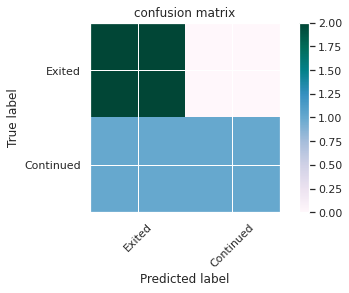

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

confusion = confusion_matrix(testY, predY)
print(confusion)

plot_confusion_matrix(confusion, data.Exited.unique(), title ='confusion matrix', cmap=plt.cm.PuBuGn)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predY,pos_label='Exited')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predY,pos_label='Exited')))
print('Recall score on test data is %.2f' % (recall_score(testY, predY,pos_label='Exited')))
print( classification_report(testY,predY))


In [20]:

list(data.Exited.unique())


['Exited', 'Continued']

## Logistic Regression

In this section, we apply a Logistic Regression to the Churn_Modelling dataset described in the previous subsection.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']
['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']
['Continued' 'Continued' 'Continued' 'Continued']
['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Accuracy')

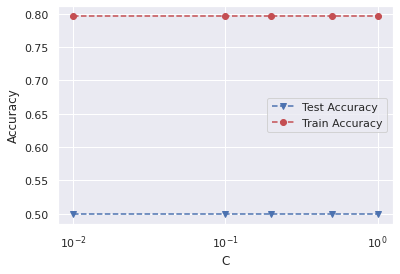

In [21]:
from sklearn.linear_model import LogisticRegression


C = [0.01, 0.1, 0.2, 0.5,1]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,Y)
   
    log_reg_pred = clf.predict(testX)
    log_reg_pred_train = clf.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(testY, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [22]:
 model_lg=clf.fit(X_train,Y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print('Accuracy on test data is %.2f for logistic regression' % (accuracy_score(Y_test,model_lg)))

Accuracy on test data is 0.79 for logistic regression


## Naive Bayes Classifier

In this section, we apply a Naise Bayes classifier to the Churn _Modelling dataset described in the previous subsection.

In [24]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(testX)
print(NB_pred)

# print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))

['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
model_nb=clf_NB.fit(X_train,Y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print('Accuracy on test data is %.2f for Naive Bayes' % (accuracy_score(Y_test,model_nb)))


Accuracy on test data is 0.78 for Naive Bayes


## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [0]:
model_dt=dt.fit(X_train,Y_train).predict(X_test)

In [29]:
accuracy_score(Y_test,model_dt)

0.766

In [30]:
print('Accuracy on test data is %.2f for Decision Tree Classifier' % (accuracy_score(Y_test,model_dt)))

Accuracy on test data is 0.77 for Decision Tree Classifier


## Support Vector Machine (SVM) Classifier

In this section, we apply a SVM classifier to the Churn_Modelling dataset described in the previous subsection. We will also experiment with C-parameter and different kernals and see how it effects the performance of the model.

### Linear Decision Boundary

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


Text(0, 0.5, 'Accuracy')

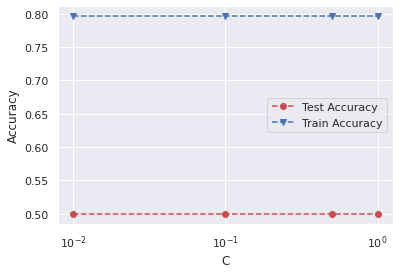

In [31]:
from sklearn.svm import SVC


C = [0.01, 0.1, 0.5,1]


SVMLtestAcc = []
SVMLtrainAcc = []

for param in C:
    clf_linear = SVC(param,kernel='linear')
    clf_linear.fit(X,Y)
    svml_pred = clf_linear.predict(testX)
    svml_pred_train = clf_linear.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [32]:
model_svml=clf_linear.fit(X_train,Y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print('Accuracy on test data is %.3f for SVM Linear' % (accuracy_score(Y_test, model_svml)))

Accuracy on test data is 0.793 for SVM Linear


### Non Linear Decision Boundary

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Continued' 'Continued' 'Continued' 'Continued']


Text(0, 0.5, 'Accuracy')

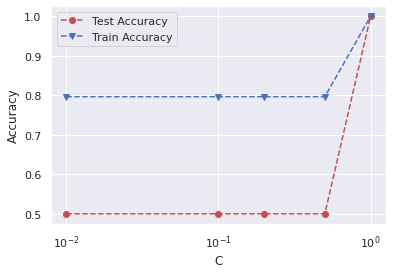

In [35]:

C = [0.01, 0.1, 0.2, 0.5,1]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf_non = SVC(C=param,kernel='rbf',gamma='auto')
    clf_non.fit(X,Y)
    svml_pred_n = clf_non.predict(testX)
    svml_pred_train_n = clf_non.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(testY, svml_pred_n))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train_n))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [37]:
model_svmnl=clf_non.fit(X_train,Y_train).predict(X_test)
print('Accuracy on test data is %.3f for SVM non Linear' % (accuracy_score(Y_test, model_svmnl)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on test data is 0.793 for SVM non Linear


## K Nearest Neighbor (KNN) Classifier

In this section, we apply a K - Nearest Neighbor classifier to the Churn_Modelling dataset described in the previous subsection. We will also look at how the K value effect the performance of the Model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


['Continued' 'Exited' 'Continued' 'Exited']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


['Continued' 'Continued' 'Continued' 'Exited']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


['Continued' 'Continued' 'Continued' 'Exited']


Text(0, 0.5, 'Accuracy')

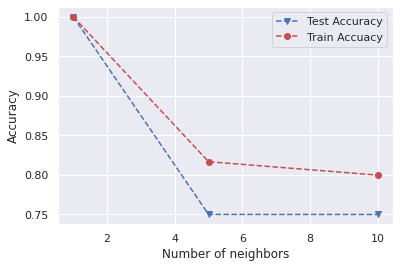

In [46]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
  clf_k = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
  clf_k.fit(X, Y)
  knn_pred = clf_k.predict(testX)
  knn_pred_train = clf_k.predict(X)
  print(knn_pred)
  testAcc.append(accuracy_score(testY, knn_pred))
  trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [39]:
model_kn=clf_k.fit(X_train,Y_train).predict(X_test)
print('Accuracy on test data is %.2f for KNN' % (accuracy_score(Y_test, model_kn)))

Accuracy on test data is 0.79 for KNN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
